<a href="https://colab.research.google.com/github/raj4477/Backend-Demo/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

def get_crypto_price(crypto_id):
    url = f'https://api.coingecko.com/api/v3/simple/price?ids={crypto_id}&vs_currencies=usd'
    response = requests.get(url)
    data = response.json()
    return data[crypto_id]['usd']

# Example usage
bitcoin_price = get_crypto_price('bitcoin')
print(f"Current Bitcoin Price: ${bitcoin_price}")


Current Bitcoin Price: $99319


In [ ]:
import requests
import pandas as pd

def fetch_historical_data(crypto_id, days=365):
    url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart?vs_currency=usd&days={days}'
    response = requests.get(url)
    data = response.json()

    # Extract the prices
    prices = data['prices']
    # Convert to a DataFrame
    df = pd.DataFrame(prices, columns=['Timestamp', 'Price'])
    df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df.set_index('Date', inplace=True)
    return df[['Price']]

# Fetch historical data for Bitcoin (last 365 days)
bitcoin_data = fetch_historical_data('bitcoin', days=365)

# Save to CSV
bitcoin_data.to_csv('bitcoin_price.csv')
print("Data saved to bitcoin_price.csv")


Data saved to bitcoin_price.csv


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1418
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0151
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0093
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0078
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0066
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0059
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0047
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0047
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0042
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0037
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0035
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0043
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0037
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0032
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0035
Epoch 16/50
1

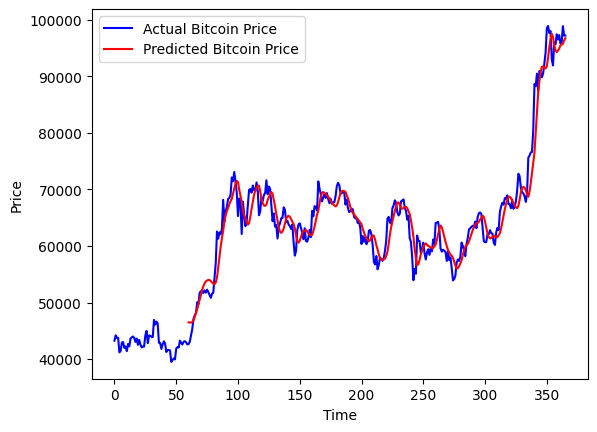

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('bitcoin_price.csv')
prices = data['Price'].values.reshape(-1, 1)

# Normalize the prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Prepare the data for LSTM
look_back = 60
X, y = [], []
for i in range(look_back, len(scaled_prices)):
    X.append(scaled_prices[i-look_back:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)

# Predict future prices
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.plot(prices, color='blue', label='Actual Bitcoin Price')
plt.plot(np.arange(look_back, len(prices)), predicted_prices, color='red', label='Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


### Compare

In [ ]:
## Fetch Data


import requests
import pandas as pd

def fetch_historical_data(crypto_id, from_date):
    url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range'
    params = {
        'vs_currency': 'usd',
        'from': from_date.timestamp(),
        'to': pd.Timestamp.now().timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Extract the prices
    prices = data['prices']
    # Convert to a DataFrame
    df = pd.DataFrame(prices, columns=['Timestamp', 'Price'])
    df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df.set_index('Date', inplace=True)
    return df[['Price']]

# Fetch historical data for Bitcoin from January 10, 2020
from_date = pd.Timestamp('2020-01-10')
bitcoin_data = fetch_historical_data('bitcoin', from_date)

# Save to CSV
bitcoin_data.to_csv('bitcoin_price.csv')
print("Data saved to bitcoin_price.csv")

Data saved to bitcoin_price.csv


In [ ]:
## Prepare the Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('bitcoin_price.csv')
prices = data['Price'].values.reshape(-1, 1)

# Normalize the prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Prepare the data for LSTM
look_back = 60
X, y = [], []
for i in range(look_back, len(scaled_prices)):
    X.append(scaled_prices[i-look_back:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [ ]:
## Build and Train LSTM mdoel

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0294
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0013
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0011
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 9.4806e-04
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 8.8254e-04
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 9.4127e-04
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 8.1944e-04
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 7.5906e-04
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 6.3494e-04
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 7.8250e-04
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 5.8689e-04
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 5.5528e-04
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.2621e-04
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.0267e-04
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


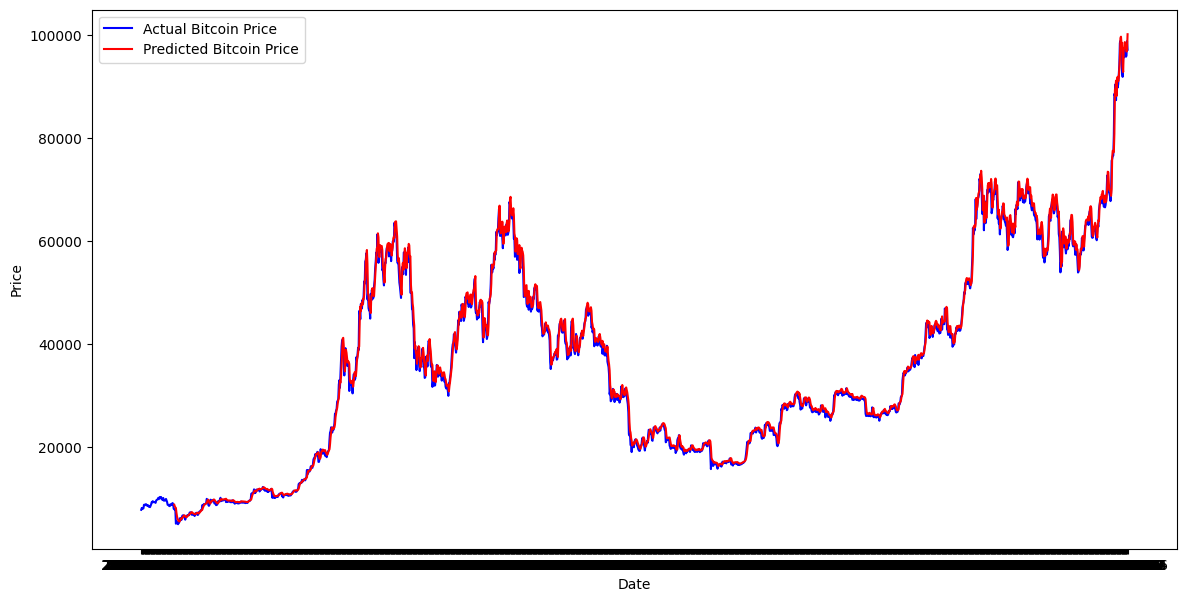

In [ ]:
# Predict future prices
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Append future predictions to the actual prices for plotting
future_days = 30  # Number of days to predict into the future
last_look_back = scaled_prices[-look_back:].reshape(1, look_back, 1)

predicted_future_prices = []
for _ in range(future_days):
    future_price = model.predict(last_look_back)
    predicted_future_prices.append(future_price[0, 0])
    last_look_back = np.append(last_look_back[:, 1:, :], future_price.reshape(1, 1, 1), axis=1)

predicted_future_prices = scaler.inverse_transform(np.array(predicted_future_prices).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], prices, color='blue', label='Actual Bitcoin Price')
plt.plot(data['Date'][look_back:], predicted_prices, color='red', label='Predicted Bitcoin Price')
#plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=future_days, freq='D'), predicted_future_prices, color='green', label='Predicted Future Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Buy price on January 10, 2021
buy_price = prices[data['Date'] == '2021-01-10'][0][0]

# Determine when to sell for a 20% profit
sell_price = None
for future_price in predicted_future_prices:
    if future_price > buy_price * 1.2:
        sell_price = float(future_price)
        break

if sell_price:
    print(f"Sell Bitcoin at ${sell_price:.2f} for a 20% profit.")
else:
    print("Hold Bitcoin for now.")


Sell Bitcoin at $98626.30 for a 20% profit.


<ipython-input-12-f88505d10ffb>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sell_price = float(future_price)
